In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
from pysb.simulator import CupSodaSimulator
from pysb.simulator import ScipyOdeSimulator
from pysb.simulator.bng import BngSimulator
from necro_uncal_new_updated import model as model100
from necro_uncal_new_10tnf import model as model10
# from necro_uncal_new_1tnf import model as model1
# from necro_uncal_new_01tnf import model as model01
import pandas as pd
# alias_model_components(model100, model10, model1, model01)
from scipy import stats
from pysb.simulator import SimulationResult

In [2]:
par_files = np.load('most_likely_par_25k_necropydream_may2020.npy')
n_pars = len(par_files)
all_pars = np.zeros((n_pars, len(model100.parameters)))

rate_params = model100.parameters_rules() # these are only the parameters involved in the rules
param_values = np.array([p.value for p in model100.parameters]) # these are all the parameters
rate_mask = np.array([p in rate_params for p in model100.parameters])

for i in range(n_pars):
    par = par_files[i]
    param_values[rate_mask] = 10 ** par
    all_pars[i] = param_values
print(len(all_pars))    

25000


In [3]:
par_files = np.load('most_likely_par_25k_necropydream_may2020.npy')
n_pars = len(par_files)
all_pars2 = np.zeros((n_pars, len(model10.parameters)))

rate_params = model10.parameters_rules() # these are only the parameters involved in the rules
param_values = np.array([p.value for p in model10.parameters]) # these are all the parameters
rate_mask = np.array([p in rate_params for p in model10.parameters])

for i in range(n_pars):
    par = par_files[i]
    param_values[rate_mask] = 10 ** par
    all_pars2[i] = param_values
print(len(all_pars2)) 

25000


In [4]:
print('running simulations 100')
# t = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
tspan = np.linspace(0, 1440, 300)
solver100 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
result100 = solver100.run(param_values=all_pars, num_processors = 20)
result100.save('necro_pydream_5chns_25k_5620_100tnf.h5')
# df = result100.dataframe
# result10.save('necro_pydream_5chns_929_10tnf_updated_kocyld.h5')
df1 = result100.dataframe

2020-05-07 18:39:13.632 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created


running simulations 100


2020-05-07 18:39:14.164 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2020-05-07 18:39:14.228 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2020-05-07 18:39:16.236 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 20 processes
2020-05-07 18:46:04.939 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2020-05-07 18:46:04.940 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2020-05-07 18:46:12.337 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [6]:
print('running simulations 10')
tspan = np.linspace(0, 1440, 300)
solver10 = ScipyOdeSimulator(model10, tspan=tspan, verbose = True)
result10 = solver10.run(param_values=all_pars2, num_processors = 20)
result10.save('necro_pydream_5chns_25k_5620_10tnf.h5')
df2 = result10.dataframe
# df2 = result10.dataframe

2020-05-07 19:41:56.523 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Simulator created
2020-05-07 19:41:56.529 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Equation mode set to "cython"
2020-05-07 19:41:56.564 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] Simulation(s) started


running simulations 10


2020-05-07 19:41:58.459 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Multi-processor (parallel) mode using 20 processes
2020-05-07 19:44:55.036 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] All simulation(s) complete
2020-05-07 19:44:55.037 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor started
2020-05-07 19:45:02.097 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor finished


In [ ]:
x101 = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
# x102 = np.array([600, 720, 840, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,
                0.088128107774737, 0.17, 0.30055140114867, 0.47])
# y102 = np.array([0.088128107774737, 0.17, 0.30055140114867, 0.47])

x1001 = np.array([0, 30, 90, 270,480, 600, 720, 840, 960])
# x1002 = np.array([480, 600, 720, 840, 960])
y1002 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882,
                  0.2798939020159581, 0.510, .8097294067, 0.95,0.98])
# y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
plt.figure()
# for n in range(10000):
plt.plot(tspan/60, df1['MLKLa_obs'].iloc[:],lw=1.5, color ='green', label ='100 TNF',  zorder = 1, marker ='*', alpha = 0.30)
plt.scatter(x1001/60, y1002*5544)
plt.plot(tspan/60, df2['MLKLa_obs'].iloc[:],lw=1.5, color ='green', label ='10 TNF',  zorder = 1, marker ='*', alpha = 0.30)
plt.scatter(x101/60, y101*5544)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
plt.title('pMLKL with 100 ng/ml of TNF', fontsize=15)
plt.xlim(xmin = 0, xmax = 24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# custom_lines = [Line2D([0], [0], color='green', lw=4),
#                 Line2D([0], [0], color='blue', lw=4)]
# plt.legend(custom_lines, ['Flip_wt', 'Flip_ko'], prop={'size': 10}, loc = 'best')
# plt.savefig('pmlkl_100tnf_wdata_pydream_best10kpars_t.png',dpi=300)
# plt.ylim(ymin = -10, ymax =100)
# plt.legend(loc='best')
plt.show()

In [ ]:
plt.figure()
for n in range(25000):
    plt.plot(tspan/60, df1.loc[n]['MLKLa_obs'].iloc[:]/5544,lw=1.5, color ='green', label ='Flip_wt',  zorder = 1, marker ='*', alpha = 0.30)
    plt.plot(tspan/60, df5.loc[n]['MLKLa_obs'].iloc[:]/5544,lw=1.5, color ='blue', label ='Flip_ko', zorder = 1, marker ='*', alpha = 0.30)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
# plt.title('Flip vs Flip KO with 100 ng/ml of TNF', fontsize=15)
plt.xlim(xmin = 0, xmax = 24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
custom_lines = [Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='blue', lw=4)]
plt.legend(custom_lines, ['Flip_wt', 'Flip_ko'], prop={'size': 10}, loc = 'best')
# plt.savefig('pmlkl_100tnf_wdata_pydream_best10kpars_t.png',dpi=300)
# plt.ylim(ymin = -10, ymax =100)
# plt.legend(loc='best')
plt.show()

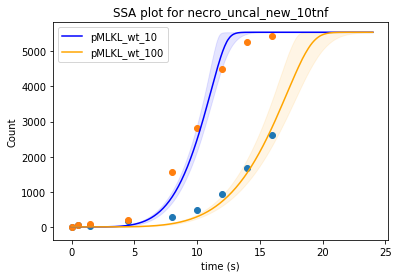

In [11]:
x101 = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
# x102 = np.array([600, 720, 840, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,
                0.088128107774737, 0.17, 0.30055140114867, 0.47])
# y102 = np.array([0.088128107774737, 0.17, 0.30055140114867, 0.47])

x1001 = np.array([0, 30, 90, 270,480, 600, 720, 840, 960])
# x1002 = np.array([480, 600, 720, 840, 960])
y1002 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882,
                  0.2798939020159581, 0.510, .8097294067, 0.95,0.98])

# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([result100.dataframe, result10.dataframe],
               keys=['mlkl100', 'mlkl10'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'mlkl100'): 'blue',
    ('MLKLa_obs', 'mlkl10'): 'orange'
}

lower_quantile = 0.1  # 10%
upper_quantile = 0.9  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)

# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
# plt.title('wgiubeiod',fontsize=14) # Title
# plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
# plt.xlabel('Time (hours)', fontsize = 14) # X label
# Add axis labels and title
# plt.set(xlabel='Time (hours)', ylabel='Amount [molecules/cell]', title=f'{model100.name}', fontsize = 14)
# Add grid
# ax.grid()
plt.scatter(x101/60, y101*5544)
plt.scatter(x101/60, y1002*5544)
ax.legend(['pMLKL_wt_10', 'pMLKL_wt_100'])
# Add axis labels and title
ax.set(xlabel='time (s)', ylabel='Count', title=f'SSA plot for {model10.name}')
# fig.savefig("test.png")
plt.show()

In [13]:
import sys 
sys.path.append('..')
# sys.path.insert(0,'/home/ildefog/pydyno')
import pydyno
print(pydyno.__file__)
from pydyno.discretization.pysb_discretize import PysbDomPath
from pydyno.seqanalysis import SeqAnalysis
from pydyno.visualize_simulations import VisualizeSimulations
from pydyno.visualize_discretization import visualization_path
%matplotlib inline
import random
import h5py

/home/ildefog/miniconda3/envs/calibration/lib/python3.7/site-packages/pydyno/__init__.py


In [15]:
# random.seed(412873)
dp10 = PysbDomPath(model10,'necro_pydream_5chns_25k_5620_100tnf.h5')
signatures, paths = dp10.get_path_signatures(target='s36', type_analysis='production', 
                                             depth=15, dom_om=0.5, num_processors =20)

In [ ]:
signatures.dissimilarity_matrix(n_jobs=15)